In [1]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
import pandas as pd
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
import phoebe
import numpy as np

logger = phoebe.logger('error')

In [20]:
b=phoebe.default_binary()

In [21]:
print(b.get_adjustable_parameters())

ParameterSet: 30 parameters
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
                        Av@system: 0.0
                        Rv@system: 3.1
         requiv@primary@component: 1.0 solRad
           teff@primary@component: 6000.0 K
           abun@primary@component: 0.0
        syncpar@primary@component: 1.0
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
       requiv@secondary@component: 1.0 solRad
         teff@secondary@component: 6000.0 K
         abun@secondary@component: 0.0
      syncpar@secondary@component: 1.0
        pitch@secondary@component: 0.0 deg
          yaw@secondary@component: 0.0 deg
    gravb_bol@secondary@component: 0.32
   irrad_frac_refl_bol@seconda...: 0.6
          period@binary@component: 1.0 d
            dpdt@binary@component: 0.0 s / yr
            per0@binary@component: 0.0 deg
          d

### Paper: Discovery of β Cep pulsations in the eclipsing binary V453 Cygni [doi:10.1093/mnrasl/slaa091]

<img src=chttps://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/parameters.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/parameters.png 'Title' )


In [22]:

b['requiv@primary@component']=1.325
b['requiv@secondary@component']=1.005

b['teff@primary@component']=6680
b['teff@secondary@component']= 6200

b['sma@binary@component']=41.03

b['period@binary@component']= 20.178
b['per0@binary@component']=158.86
b['ecc@binary@component']=0.3095
b['incl@binary@component']=89.51
b['q@binary@component']=0.8630
b['t0_supconj@binary@component']=0


In [23]:
b['gravb_bol@primary@component']=1
b['gravb_bol@secondary@component']=0.32

In [49]:
lctimes=phoebe.linspace(0,100,501)
rvtimes=phoebe.linspace(0,100,101)
b.add_dataset('lc', times=lctimes, dataset='lc01',overwrite=True)
b.add_dataset('rv', times=rvtimes, dataset='rv01',overwrite=True)

<ParameterSet: 50 parameters | contexts: constraint, compute, dataset, figure>

### As the above did not have limb darkening values, I refered to the previous paper by the same author
[doi:10.1093/mnras/sty2516]

![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png "Title")

In [50]:
b.set_value_all('atm','phoenix')
b.set_value_all('passband','Johnson:V')

In [51]:
print(b.filter(dataset='lc01'))

ParameterSet: 28 parameters
               times@lc01@dataset: [  0.    0.2   0.4 ...  99.6  99.8 100. ] d
              fluxes@lc01@dataset: [] W / m2
            passband@lc01@dataset: Johnson:V
    intens_weighting@lc01@dataset: energy
       compute_times@lc01@dataset: [] d
C     compute_phases@lc01@dataset: []
           phases_t0@lc01@dataset: t0_supconj
        mask_enabled@lc01@dataset: True
         mask_phases@lc01@dataset: []
        solver_times@lc01@dataset: auto
              sigmas@lc01@dataset: [] W / m2
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2
             exptime@lc01@dataset: 0.0 s
    enabled@lc01@phoebe01@compute: True
      fti_method@phoebe01@compute: none
   enabled@lc01@fastcompute@co...: True
   fti_method@fastcompute@compute: none
     ld_mode@primary@lc01@dataset: interp
   ld_mode@secondary@lc01@dataset: interp
       

In [52]:
b.set_value_all(qualifier='ld_mode', value='manual')
b.set_value_all(qualifier='ld_func', value='square_root')
b.set_value_all(qualifier='ld_coeffs', component='primary', value=[0.125,0.727])
b.set_value_all(qualifier='ld_coeffs', component='secondary', value=[0.259,0.598])

In [53]:
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('ld_func_bol','square_root')
b.set_value('ld_coeffs_bol@primary@component',[0.097,0.661])
b.set_value('ld_coeffs_bol@secondary@component',[0.173, 0.577])
b.set_value('irrad_frac_refl_bol@primary@component',0.6)
b.set_value('irrad_frac_refl_bol@secondary@component',0.6)



In [55]:
print(b.run_checks())

Run Checks Report: PASS



In [64]:
b.add_compute('phoebe', compute='fastcompute',overwrite=True)
b.run_compute(compute='fastcompute')

fluxes = b.get_value('fluxes@model') + np.random.normal(size=lctimes.shape) * 0.01
fsigmas = np.ones_like(lctimes) * 0.02

rvsA = b.get_value('rvs@primary@model') + np.random.normal(size=rvtimes.shape) * 5
rvsB = b.get_value('rvs@secondary@model') + np.random.normal(size=rvtimes.shape) * 5
rvsigmas = np.ones_like(rvtimes) * 10

100%|█████████████████████████████████████████████████████████████████████████| 501/501 [03:15<00:00,  2.56it/s]


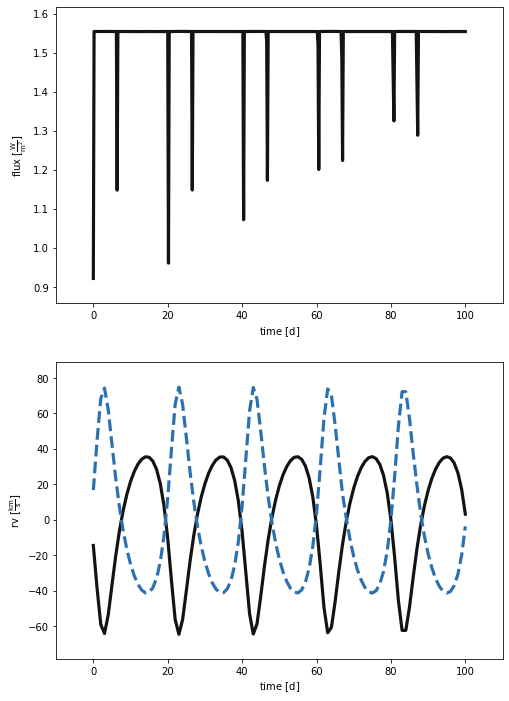

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [66]:
b.plot(x='times',show=True,legends=True,save='LL_aqr.jpeg')

In [58]:
nb = phoebe.default_binary()
nb['period@binary@component']=20.178

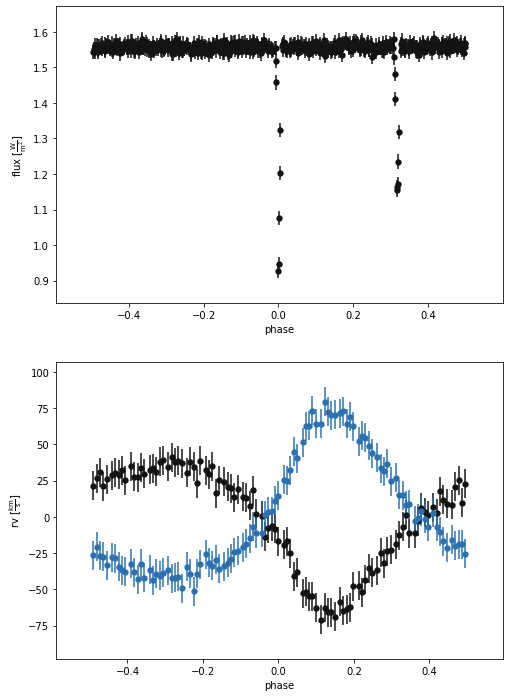

In [59]:
nb.add_dataset('lc', times = lctimes, fluxes=fluxes, sigmas=fsigmas,dataset='lc01', passband='Johnson:V',overwrite=True)
nb.add_dataset('rv',dataset='rv01',overwrite=True)
nb['times@rv@primary'], nb['rvs@rv@primary'], nb['sigmas@rv@primary'] = rvtimes, rvsA, rvsigmas
nb['times@rv@secondary'], nb['rvs@rv@secondary'], nb['sigmas@rv@secondary'] = rvtimes, rvsB, rvsigmas
_ = nb.plot(x='phases', show=True,m='.')

In [60]:
data1=pd.DataFrame({'Times':lctimes,
                   'Fluxes':fluxes,
                   'Sigma':fsigmas})
data1.to_csv('lcdata_LLaqr.out',index=False,header=False)

In [61]:
data2=pd.DataFrame({'Times':rvtimes,
                   'Fluxes':rvsA,
                       'Sigma':rvsigmas})
data2.to_csv('rv1data_LLaqr.out',index=False,header=False)

data3=pd.DataFrame({'Times':rvtimes,
                   'Fluxes':rvsB,
                       'Sigma':rvsigmas})
data3.to_csv('rv2data_LLaqr.out',index=False,header=False)